In [97]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2
import os
import galsim
import numpy as np
import fpfs
import matplotlib.pyplot as plt

import batsim.pltutil as batplot
from batsim.stamp import Stamp
from batsim.transforms import IaTransform, LensTransform

### Fit A_IA galaxy scale dependence

[0.00136207 0.82404653]


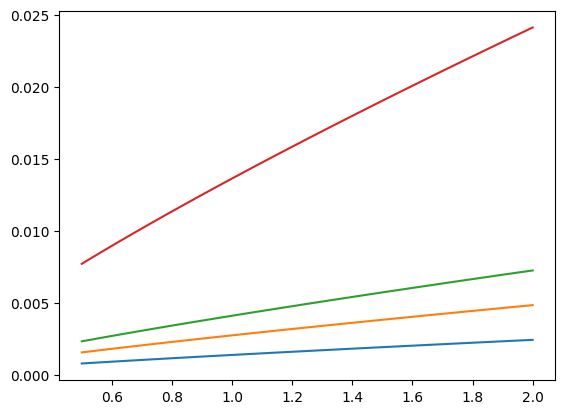

In [339]:
# fit curve to GAMA results in Georgieu 2019
from scipy.optimize import curve_fit

rwf = np.linspace(0.5,2.0,5)

A_IA = [0.0009, 0.0012, 0.0015, 0.002, 0.0025]

def power_law(rwf, m, b):
    return m * rwf**b

var, covs = curve_fit(power_law, rwf, A_IA)
print(var)
rwf_dense = np.linspace(0.5,2.0,100)
A_dense = var[0] * rwf_dense**var[1]
A_dense_2 = 2*var[0] * rwf_dense**var[1]
A_dense_3 = 3*var[0] * rwf_dense**var[1]
A_dense_10 = 10*var[0] * rwf_dense**var[1]

#plt.plot(rwf, A_IA, marker='o')
plt.plot(rwf_dense, A_dense)
plt.plot(rwf_dense, A_dense_2)
plt.plot(rwf_dense, A_dense_3)
plt.plot(rwf_dense, A_dense_10)
# plt.yscale('log')

In [340]:
print(A_dense[30]/A_dense[60])
print(A_dense_2[30]/A_dense_2[60])
print(A_dense_3[30]/A_dense_3[60])
print(A_dense_10[30]/A_dense_10[60])

0.7254688891020777
0.7254688891020777
0.7254688891020776
0.7254688891020777


### Test with a power of 0 (constant shear)

Text(0.5, 1.0, 'Preliminary')

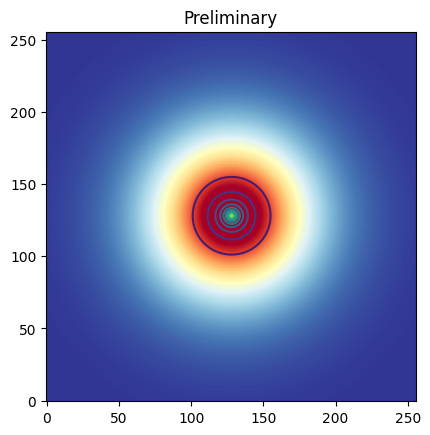

In [312]:
## create a galaxy with raidall dependent shear
flux = 40
scale = 0.05
nn = int((hlr * 8.533333333333333)/scale)
hlr = 1.5
trunc = 0

# create galaxy to be sampled by shear stamp objects
sersic_gal = galsim.Sersic(n=1.5, half_light_radius=hlr, flux=flux, trunc=trunc)

# # # apply lensing shear to galaxy
stamp = Stamp(nn=nn, scale=scale, centering='fpfs')

# define ia shear as a % of lensing
ia = IaTransform(beta=0, phi=np.radians(0), center=[0,0], scale=scale, hlr=hlr)
stamp.transform_grids(ia)

# get galaxy array from stamp object
gal_array = stamp.sample_galaxy(sersic_gal)
batplot.make_plot_image(gal_array)
plt.contour(gal_array, levels=15)
plt.title('Preliminary')

In [313]:
# define PSF
psf_array = np.zeros(stamp.shape)
psf_array[nn // 2, nn // 2] = 1

coords = np.array([nn//2, nn//2])
fpTask  =   fpfs.image.measure_source(psf_array, pix_scale = scale, sigma_arcsec=0.6)
mms =  fpTask.measure(gal_array, coords)
mms = fpTask.get_results(mms)
ells=   fpfs.catalog.fpfs_m2e(mms,const=2000)
resp=np.average(ells['fpfs_R1E'])
shear=np.average(ells['fpfs_e1'])/resp
print("measured shear: %.6f" % shear)

inner_shear = shear

2023/10/18 20:07:56 ---  Order of the shear estimator: nnord=4
2023/10/18 20:07:56 ---  Shapelet kernel in configuration space: sigma= 0.6000 arcsec
2023/10/18 20:07:56 ---  Detection kernel in configuration space: sigma= 0.6000 arcsec


measured shear: 0.001362


In [314]:
fpTask  =   fpfs.image.measure_source(psf_array, pix_scale = scale, sigma_arcsec=1.2)
mms =  fpTask.measure(gal_array, coords)
mms = fpTask.get_results(mms)
ells=   fpfs.catalog.fpfs_m2e(mms,const=2000)
resp=np.average(ells['fpfs_R1E'])
shear=np.average(ells['fpfs_e1'])/resp
print("measured shear: %.6f" % shear)

outer_shear = shear

2023/10/18 20:07:58 ---  Order of the shear estimator: nnord=4
2023/10/18 20:07:58 ---  Shapelet kernel in configuration space: sigma= 1.2000 arcsec
2023/10/18 20:07:58 ---  Detection kernel in configuration space: sigma= 1.2000 arcsec


measured shear: 0.001362


In [315]:
print('a =', inner_shear / outer_shear)
print('inner bias = ', var[0] - inner_shear)
print('outer bias = ', var[0] - outer_shear)

a = 0.999989549628232
inner bias =  1.1848354197502992e-08
outer bias =  -2.3858397046189195e-09


### Now test with non-zero index

Text(0.5, 1.0, 'Preliminary')

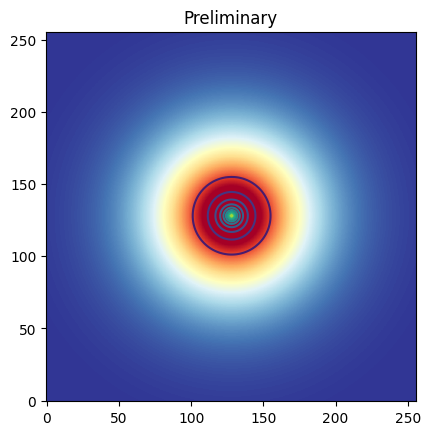

In [366]:
# # # apply lensing shear to galaxy
stamp = Stamp(nn=nn, scale=scale, centering='fpfs')

# define ia shear as a % of lensing
ia = IaTransform(A=0.00136207, center=[0,0], scale=scale, hlr=hlr)
stamp.transform_grids(ia)

# get galaxy array from stamp object
gal_array = stamp.sample_galaxy(sersic_gal)
batplot.make_plot_image(gal_array)
plt.contour(gal_array, levels=15)
plt.title('Preliminary')

In [367]:
coords = np.array([nn//2, nn//2])
fpTask  =   fpfs.image.measure_source(psf_array, pix_scale = scale, sigma_arcsec=0.6)
mms =  fpTask.measure(gal_array, coords)
mms = fpTask.get_results(mms)
ells=   fpfs.catalog.fpfs_m2e(mms,const=2000)
resp=np.average(ells['fpfs_R1E'])
shear=np.average(ells['fpfs_e1'])/resp
print("measured shear: %.6f" % shear)

inner_shear = shear

2023/10/18 20:44:58 ---  Order of the shear estimator: nnord=4
2023/10/18 20:44:58 ---  Shapelet kernel in configuration space: sigma= 0.6000 arcsec
2023/10/18 20:44:58 ---  Detection kernel in configuration space: sigma= 0.6000 arcsec


measured shear: 0.000983


In [368]:
fpTask  =   fpfs.image.measure_source(psf_array, pix_scale = scale, sigma_arcsec=1.2)
mms =  fpTask.measure(gal_array, coords)
mms = fpTask.get_results(mms)
ells=   fpfs.catalog.fpfs_m2e(mms,const=2000)
resp=np.average(ells['fpfs_R1E'])
shear=np.average(ells['fpfs_e1'])/resp
print("measured shear: %.6f" % shear)

outer_shear = shear

2023/10/18 20:44:59 ---  Order of the shear estimator: nnord=4
2023/10/18 20:44:59 ---  Shapelet kernel in configuration space: sigma= 1.2000 arcsec
2023/10/18 20:44:59 ---  Detection kernel in configuration space: sigma= 1.2000 arcsec


measured shear: 0.001583


In [369]:
print('a =', inner_shear / outer_shear)

a = 0.6212935724219736


In [370]:
# check measurement at assumed half light radius

fpTask  =   fpfs.image.measure_source(psf_array, pix_scale = scale, sigma_arcsec=0.957)
mms =  fpTask.measure(gal_array, coords)
mms = fpTask.get_results(mms)
ells=   fpfs.catalog.fpfs_m2e(mms,const=2000)
resp=np.average(ells['fpfs_R1E'])
shear=np.average(ells['fpfs_e1'])/resp
print("measured shear: %.6f" % shear)

print(var[0] - shear)

2023/10/18 20:45:02 ---  Order of the shear estimator: nnord=4
2023/10/18 20:45:02 ---  Shapelet kernel in configuration space: sigma= 0.9570 arcsec
2023/10/18 20:45:02 ---  Detection kernel in configuration space: sigma= 0.9570 arcsec


measured shear: 0.001362
-2.1255994231937636e-07


### Test ratio is constant for different input amplitudes, scales etc.

In [362]:
def test_amplitudes(A_IA):
    
    # # # apply lensing shear to galaxy
    stamp = Stamp(nn=nn, scale=scale, centering='fpfs')

    # define ia shear as a % of lensing
    ia = IaTransform(A=A_IA, center=[0,0], scale=scale, hlr=hlr)
    stamp.transform_grids(ia)

    # get galaxy array from stamp object
    gal_array = stamp.sample_galaxy(sersic_gal)
    
    return gal_array

In [380]:
# test a constancy for differnt amps
A_IAs = np.linspace(0.000136207,0.0136207,50)

a_amps = []
diffs = []
for A_IA in A_IAs:
    
    gal_array = test_amplitudes(A_IA)
    
    coords = np.array([nn//2, nn//2])
    fpTask  =   fpfs.image.measure_source(psf_array, pix_scale = scale, sigma_arcsec=0.6)
    mms =  fpTask.measure(gal_array, coords)
    mms = fpTask.get_results(mms)
    ells=   fpfs.catalog.fpfs_m2e(mms,const=2000)
    resp=np.average(ells['fpfs_R1E'])
    inner_shear=np.average(ells['fpfs_e1'])/resp
    
    fpTask  =   fpfs.image.measure_source(psf_array, pix_scale = scale, sigma_arcsec=1.2)
    mms =  fpTask.measure(gal_array, coords)
    mms = fpTask.get_results(mms)
    ells=   fpfs.catalog.fpfs_m2e(mms,const=2000)
    resp=np.average(ells['fpfs_R1E'])
    outer_shear=np.average(ells['fpfs_e1'])/resp
    
    a_amps.append(inner_shear / outer_shear)
    
    diffs.append(outer_shear - inner_shear)

2023/10/18 20:50:40 ---  Order of the shear estimator: nnord=4
2023/10/18 20:50:40 ---  Shapelet kernel in configuration space: sigma= 0.6000 arcsec
2023/10/18 20:50:40 ---  Detection kernel in configuration space: sigma= 0.6000 arcsec
2023/10/18 20:50:40 ---  Order of the shear estimator: nnord=4
2023/10/18 20:50:40 ---  Shapelet kernel in configuration space: sigma= 1.2000 arcsec
2023/10/18 20:50:40 ---  Detection kernel in configuration space: sigma= 1.2000 arcsec
2023/10/18 20:50:41 ---  Order of the shear estimator: nnord=4
2023/10/18 20:50:41 ---  Shapelet kernel in configuration space: sigma= 0.6000 arcsec
2023/10/18 20:50:41 ---  Detection kernel in configuration space: sigma= 0.6000 arcsec
2023/10/18 20:50:41 ---  Order of the shear estimator: nnord=4
2023/10/18 20:50:41 ---  Shapelet kernel in configuration space: sigma= 1.2000 arcsec
2023/10/18 20:50:41 ---  Detection kernel in configuration space: sigma= 1.2000 arcsec
2023/10/18 20:50:42 ---  Order of the shear estimator: n

Max percentage change in a 0.04094944928146999


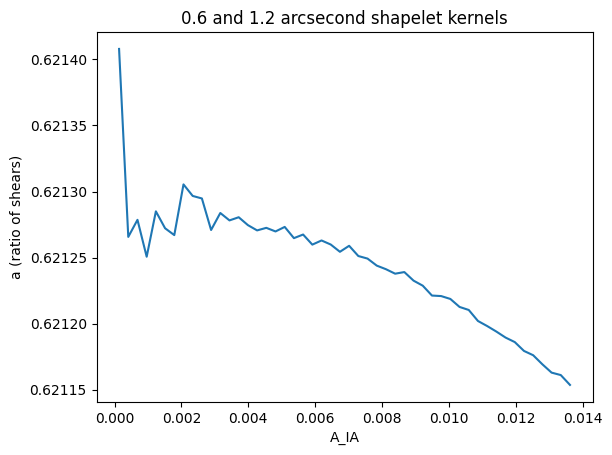

In [392]:
plt.plot(A_IAs, a_amps)
#plt.ylim([0.61,0.63])
plt.xlabel('A_IA')
plt.ylabel('a (ratio of shears)')
plt.title('0.6 and 1.2 arcsecond shapelet kernels')

perc_var = (max(a_amps) - min(a_amps)) / min(a_amps) * 100 
print('Max percentage change in a', perc_var)

Max percentage change in estimated yIA 0.06718550292083034


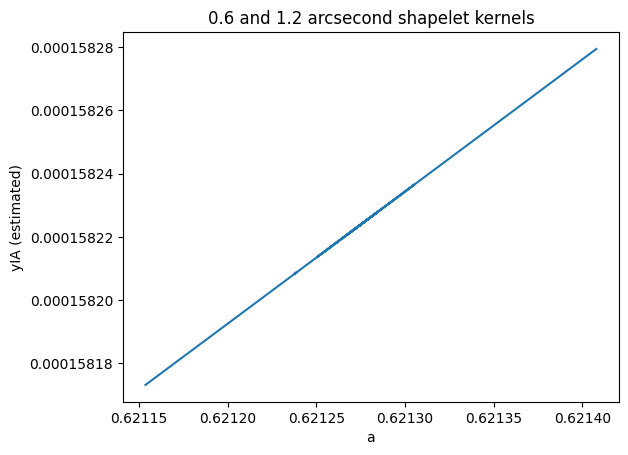

In [397]:
min_diff = min(diffs)
estimated_yIA = min_diff / (1-np.asarray(a_amps))

plt.plot(a_amps, estimated_yIA)
#plt.ylim([0.61,0.63])
plt.xlabel('a')
plt.ylabel('yIA (estimated)')
plt.title('0.6 and 1.2 arcsecond shapelet kernels')

perc_var = ((max(estimated_yIA) - min(estimated_yIA)) / min(estimated_yIA)) * 100 
print('Max percentage change in estimated yIA', perc_var)

In [253]:
def test_scales(scale):

    # fix galaxy size relative to stamp by adding more pixels
    # nn should be 8.533... times large than galaxy
    nn = int((hlr * 8.533333333333333)/scale)

    # apply lensing shear to galaxy
    stamp = Stamp(nn=nn, scale=scale, centering='fpfs')

    # define ia shear as a % of lensing
    ia = IaTransform(center=[0,0], scale=scale, hlr=hlr)
    stamp.transform_grids(ia)
    
    # get galaxy array from stamp object
    gal_array = stamp.sample_galaxy(sersic_gal)
    
    # define PSF
    psf_array = np.zeros(stamp.shape)
    psf_array[nn // 2, nn // 2] = 1
    
    coords = np.array([nn//2, nn//2])
    fpTask  =   fpfs.image.measure_source(psf_array, pix_scale = scale, sigma_arcsec=0.6)
    mms =  fpTask.measure(gal_array, coords)
    mms = fpTask.get_results(mms)
    ells=   fpfs.catalog.fpfs_m2e(mms,const=2000)
    resp=np.average(ells['fpfs_R1E'])
    inner_shear=np.average(ells['fpfs_e1'])/resp
    
    fpTask  =   fpfs.image.measure_source(psf_array, pix_scale = scale, sigma_arcsec=1.2)
    mms =  fpTask.measure(gal_array, coords)
    mms = fpTask.get_results(mms)
    ells=   fpfs.catalog.fpfs_m2e(mms,const=2000)
    resp=np.average(ells['fpfs_R1E'])
    outer_shear=np.average(ells['fpfs_e1'])/resp
    
    a = inner_shear / outer_shear
    print(a)
    
    inner = inner_shear
    print(inner)
    outer  = outer_shear
    print(outer)
          
    return a, inner, outer 

In [254]:
scales = np.linspace(0.2,0.005,50)

a_scale = []
in_bias_scale = []
out_bias_scale = []

for scale in scales:
    
    a, inner, outer = test_scales(scale)
    
    a_scale.append(a)
    in_bias_scale.append(inner)
    out_bias_scale.append(outer)
    

2023/10/18 19:40:13 ---  Order of the shear estimator: nnord=4
2023/10/18 19:40:13 ---  Shapelet kernel in configuration space: sigma= 0.6000 arcsec
2023/10/18 19:40:13 ---  Detection kernel in configuration space: sigma= 0.6000 arcsec
2023/10/18 19:40:13 ---  Order of the shear estimator: nnord=4
2023/10/18 19:40:13 ---  Shapelet kernel in configuration space: sigma= 1.2000 arcsec
2023/10/18 19:40:13 ---  Detection kernel in configuration space: sigma= 1.2000 arcsec
2023/10/18 19:40:13 ---  Order of the shear estimator: nnord=4
2023/10/18 19:40:13 ---  Shapelet kernel in configuration space: sigma= 0.6000 arcsec
2023/10/18 19:40:13 ---  Detection kernel in configuration space: sigma= 0.6000 arcsec


0.6215835536273044
0.0009838972924456945
0.001582888232328666


2023/10/18 19:40:14 ---  Order of the shear estimator: nnord=4
2023/10/18 19:40:14 ---  Shapelet kernel in configuration space: sigma= 1.2000 arcsec
2023/10/18 19:40:14 ---  Detection kernel in configuration space: sigma= 1.2000 arcsec
2023/10/18 19:40:14 ---  Order of the shear estimator: nnord=4
2023/10/18 19:40:14 ---  Shapelet kernel in configuration space: sigma= 0.6000 arcsec
2023/10/18 19:40:14 ---  Detection kernel in configuration space: sigma= 0.6000 arcsec


0.6215346298184955
0.0009838383535113234
0.0015829180005603714


2023/10/18 19:40:14 ---  Order of the shear estimator: nnord=4
2023/10/18 19:40:14 ---  Shapelet kernel in configuration space: sigma= 1.2000 arcsec
2023/10/18 19:40:14 ---  Detection kernel in configuration space: sigma= 1.2000 arcsec
2023/10/18 19:40:14 ---  Order of the shear estimator: nnord=4
2023/10/18 19:40:14 ---  Shapelet kernel in configuration space: sigma= 0.6000 arcsec
2023/10/18 19:40:14 ---  Detection kernel in configuration space: sigma= 0.6000 arcsec


0.6215141536147287
0.0009837941875399617
0.0015828990889720064


2023/10/18 19:40:14 ---  Order of the shear estimator: nnord=4
2023/10/18 19:40:14 ---  Shapelet kernel in configuration space: sigma= 1.2000 arcsec
2023/10/18 19:40:14 ---  Detection kernel in configuration space: sigma= 1.2000 arcsec
2023/10/18 19:40:15 ---  Order of the shear estimator: nnord=4
2023/10/18 19:40:15 ---  Shapelet kernel in configuration space: sigma= 0.6000 arcsec
2023/10/18 19:40:15 ---  Detection kernel in configuration space: sigma= 0.6000 arcsec


0.6215031444441745
0.000983759958099017
0.0015828720528498978


2023/10/18 19:40:15 ---  Order of the shear estimator: nnord=4
2023/10/18 19:40:15 ---  Shapelet kernel in configuration space: sigma= 1.2000 arcsec
2023/10/18 19:40:15 ---  Detection kernel in configuration space: sigma= 1.2000 arcsec
2023/10/18 19:40:15 ---  Order of the shear estimator: nnord=4
2023/10/18 19:40:15 ---  Shapelet kernel in configuration space: sigma= 0.6000 arcsec
2023/10/18 19:40:15 ---  Detection kernel in configuration space: sigma= 0.6000 arcsec


0.6214722578819981
0.0009837246765301328
0.0015828939490922815


2023/10/18 19:40:15 ---  Order of the shear estimator: nnord=4
2023/10/18 19:40:15 ---  Shapelet kernel in configuration space: sigma= 1.2000 arcsec
2023/10/18 19:40:15 ---  Detection kernel in configuration space: sigma= 1.2000 arcsec
2023/10/18 19:40:15 ---  Order of the shear estimator: nnord=4
2023/10/18 19:40:15 ---  Shapelet kernel in configuration space: sigma= 0.6000 arcsec
2023/10/18 19:40:15 ---  Detection kernel in configuration space: sigma= 0.6000 arcsec


0.6214472082259556
0.0009836811277440431
0.0015828876768988248


2023/10/18 19:40:16 ---  Order of the shear estimator: nnord=4
2023/10/18 19:40:16 ---  Shapelet kernel in configuration space: sigma= 1.2000 arcsec
2023/10/18 19:40:16 ---  Detection kernel in configuration space: sigma= 1.2000 arcsec
2023/10/18 19:40:16 ---  Order of the shear estimator: nnord=4
2023/10/18 19:40:16 ---  Shapelet kernel in configuration space: sigma= 0.6000 arcsec
2023/10/18 19:40:16 ---  Detection kernel in configuration space: sigma= 0.6000 arcsec


0.6214337980383845
0.0009836443194048705
0.0015828626034017433


2023/10/18 19:40:16 ---  Order of the shear estimator: nnord=4
2023/10/18 19:40:16 ---  Shapelet kernel in configuration space: sigma= 1.2000 arcsec
2023/10/18 19:40:16 ---  Detection kernel in configuration space: sigma= 1.2000 arcsec
2023/10/18 19:40:16 ---  Order of the shear estimator: nnord=4
2023/10/18 19:40:16 ---  Shapelet kernel in configuration space: sigma= 0.6000 arcsec
2023/10/18 19:40:16 ---  Detection kernel in configuration space: sigma= 0.6000 arcsec


0.6214487725143871
0.0009836605270469574
0.0015828505430416386


2023/10/18 19:40:17 ---  Order of the shear estimator: nnord=4
2023/10/18 19:40:17 ---  Shapelet kernel in configuration space: sigma= 1.2000 arcsec
2023/10/18 19:40:17 ---  Detection kernel in configuration space: sigma= 1.2000 arcsec
2023/10/18 19:40:17 ---  Order of the shear estimator: nnord=4
2023/10/18 19:40:17 ---  Shapelet kernel in configuration space: sigma= 0.6000 arcsec
2023/10/18 19:40:17 ---  Detection kernel in configuration space: sigma= 0.6000 arcsec


0.6214180973996175
0.000983611070621336
0.0015828490910344405


2023/10/18 19:40:17 ---  Order of the shear estimator: nnord=4
2023/10/18 19:40:17 ---  Shapelet kernel in configuration space: sigma= 1.2000 arcsec
2023/10/18 19:40:17 ---  Detection kernel in configuration space: sigma= 1.2000 arcsec
2023/10/18 19:40:17 ---  Order of the shear estimator: nnord=4
2023/10/18 19:40:17 ---  Shapelet kernel in configuration space: sigma= 0.6000 arcsec
2023/10/18 19:40:17 ---  Detection kernel in configuration space: sigma= 0.6000 arcsec


0.6214033175050664
0.0009835792866518967
0.0015828355899369293


2023/10/18 19:40:17 ---  Order of the shear estimator: nnord=4
2023/10/18 19:40:17 ---  Shapelet kernel in configuration space: sigma= 1.2000 arcsec
2023/10/18 19:40:17 ---  Detection kernel in configuration space: sigma= 1.2000 arcsec
2023/10/18 19:40:18 ---  Order of the shear estimator: nnord=4
2023/10/18 19:40:18 ---  Shapelet kernel in configuration space: sigma= 0.6000 arcsec
2023/10/18 19:40:18 ---  Detection kernel in configuration space: sigma= 0.6000 arcsec


0.6213634480379088
0.0009835357694077194
0.0015828671166825939


2023/10/18 19:40:18 ---  Order of the shear estimator: nnord=4
2023/10/18 19:40:18 ---  Shapelet kernel in configuration space: sigma= 1.2000 arcsec
2023/10/18 19:40:18 ---  Detection kernel in configuration space: sigma= 1.2000 arcsec
2023/10/18 19:40:18 ---  Order of the shear estimator: nnord=4
2023/10/18 19:40:18 ---  Shapelet kernel in configuration space: sigma= 0.6000 arcsec
2023/10/18 19:40:18 ---  Detection kernel in configuration space: sigma= 0.6000 arcsec


0.6213820452768085
0.0009835623194484487
0.0015828624707208896


2023/10/18 19:40:18 ---  Order of the shear estimator: nnord=4
2023/10/18 19:40:18 ---  Shapelet kernel in configuration space: sigma= 1.2000 arcsec
2023/10/18 19:40:18 ---  Detection kernel in configuration space: sigma= 1.2000 arcsec
2023/10/18 19:40:18 ---  Order of the shear estimator: nnord=4
2023/10/18 19:40:18 ---  Shapelet kernel in configuration space: sigma= 0.6000 arcsec
2023/10/18 19:40:18 ---  Detection kernel in configuration space: sigma= 0.6000 arcsec


0.6213704673358024
0.000983519010082308
0.0015828222643075704


2023/10/18 19:40:19 ---  Order of the shear estimator: nnord=4
2023/10/18 19:40:19 ---  Shapelet kernel in configuration space: sigma= 1.2000 arcsec
2023/10/18 19:40:19 ---  Detection kernel in configuration space: sigma= 1.2000 arcsec
2023/10/18 19:40:19 ---  Order of the shear estimator: nnord=4
2023/10/18 19:40:19 ---  Shapelet kernel in configuration space: sigma= 0.6000 arcsec
2023/10/18 19:40:19 ---  Detection kernel in configuration space: sigma= 0.6000 arcsec


0.6213632525818836
0.0009834937126459438
0.001582799929927202


2023/10/18 19:40:19 ---  Order of the shear estimator: nnord=4
2023/10/18 19:40:19 ---  Shapelet kernel in configuration space: sigma= 1.2000 arcsec
2023/10/18 19:40:19 ---  Detection kernel in configuration space: sigma= 1.2000 arcsec
2023/10/18 19:40:19 ---  Order of the shear estimator: nnord=4
2023/10/18 19:40:19 ---  Shapelet kernel in configuration space: sigma= 0.6000 arcsec
2023/10/18 19:40:19 ---  Detection kernel in configuration space: sigma= 0.6000 arcsec


0.6213476544046319
0.0009834893398108547
0.0015828326265321189


2023/10/18 19:40:21 ---  Order of the shear estimator: nnord=4
2023/10/18 19:40:21 ---  Shapelet kernel in configuration space: sigma= 1.2000 arcsec
2023/10/18 19:40:21 ---  Detection kernel in configuration space: sigma= 1.2000 arcsec
2023/10/18 19:40:21 ---  Order of the shear estimator: nnord=4
2023/10/18 19:40:21 ---  Shapelet kernel in configuration space: sigma= 0.6000 arcsec
2023/10/18 19:40:21 ---  Detection kernel in configuration space: sigma= 0.6000 arcsec


0.6213267112159939
0.0009834599862013655
0.0015828387359633118


2023/10/18 19:40:22 ---  Order of the shear estimator: nnord=4
2023/10/18 19:40:22 ---  Shapelet kernel in configuration space: sigma= 1.2000 arcsec
2023/10/18 19:40:22 ---  Detection kernel in configuration space: sigma= 1.2000 arcsec
2023/10/18 19:40:22 ---  Order of the shear estimator: nnord=4
2023/10/18 19:40:22 ---  Shapelet kernel in configuration space: sigma= 0.6000 arcsec
2023/10/18 19:40:22 ---  Detection kernel in configuration space: sigma= 0.6000 arcsec


0.62133557186081
0.0009834555696523343
0.0015828090555109011


2023/10/18 19:40:22 ---  Order of the shear estimator: nnord=4
2023/10/18 19:40:22 ---  Shapelet kernel in configuration space: sigma= 1.2000 arcsec
2023/10/18 19:40:22 ---  Detection kernel in configuration space: sigma= 1.2000 arcsec
2023/10/18 19:40:22 ---  Order of the shear estimator: nnord=4
2023/10/18 19:40:22 ---  Shapelet kernel in configuration space: sigma= 0.6000 arcsec
2023/10/18 19:40:22 ---  Detection kernel in configuration space: sigma= 0.6000 arcsec


0.6213381589329078
0.0009834530926566933
0.0015827984786025138


2023/10/18 19:40:23 ---  Order of the shear estimator: nnord=4
2023/10/18 19:40:23 ---  Shapelet kernel in configuration space: sigma= 1.2000 arcsec
2023/10/18 19:40:23 ---  Detection kernel in configuration space: sigma= 1.2000 arcsec
2023/10/18 19:40:23 ---  Order of the shear estimator: nnord=4
2023/10/18 19:40:23 ---  Shapelet kernel in configuration space: sigma= 0.6000 arcsec
2023/10/18 19:40:23 ---  Detection kernel in configuration space: sigma= 0.6000 arcsec


0.6213427304163089
0.000983447633209416
0.0015827780467480344


2023/10/18 19:40:23 ---  Order of the shear estimator: nnord=4
2023/10/18 19:40:23 ---  Shapelet kernel in configuration space: sigma= 1.2000 arcsec
2023/10/18 19:40:23 ---  Detection kernel in configuration space: sigma= 1.2000 arcsec
2023/10/18 19:40:23 ---  Order of the shear estimator: nnord=4
2023/10/18 19:40:23 ---  Shapelet kernel in configuration space: sigma= 0.6000 arcsec
2023/10/18 19:40:23 ---  Detection kernel in configuration space: sigma= 0.6000 arcsec


0.6213191327642306
0.0009834574445651036
0.0015828539517039018


2023/10/18 19:40:24 ---  Order of the shear estimator: nnord=4
2023/10/18 19:40:24 ---  Shapelet kernel in configuration space: sigma= 1.2000 arcsec
2023/10/18 19:40:24 ---  Detection kernel in configuration space: sigma= 1.2000 arcsec
2023/10/18 19:40:24 ---  Order of the shear estimator: nnord=4
2023/10/18 19:40:24 ---  Shapelet kernel in configuration space: sigma= 0.6000 arcsec
2023/10/18 19:40:24 ---  Detection kernel in configuration space: sigma= 0.6000 arcsec


0.6213108402621612
0.0009834297002156251
0.0015828304231754083


2023/10/18 19:40:24 ---  Order of the shear estimator: nnord=4
2023/10/18 19:40:24 ---  Shapelet kernel in configuration space: sigma= 1.2000 arcsec
2023/10/18 19:40:24 ---  Detection kernel in configuration space: sigma= 1.2000 arcsec
2023/10/18 19:40:24 ---  Order of the shear estimator: nnord=4
2023/10/18 19:40:24 ---  Shapelet kernel in configuration space: sigma= 0.6000 arcsec
2023/10/18 19:40:24 ---  Detection kernel in configuration space: sigma= 0.6000 arcsec


0.6212900464574288
0.0009834120067242081
0.0015828549199067075


2023/10/18 19:40:25 ---  Order of the shear estimator: nnord=4
2023/10/18 19:40:25 ---  Shapelet kernel in configuration space: sigma= 1.2000 arcsec
2023/10/18 19:40:25 ---  Detection kernel in configuration space: sigma= 1.2000 arcsec
2023/10/18 19:40:25 ---  Order of the shear estimator: nnord=4
2023/10/18 19:40:25 ---  Shapelet kernel in configuration space: sigma= 0.6000 arcsec
2023/10/18 19:40:25 ---  Detection kernel in configuration space: sigma= 0.6000 arcsec


0.6213861274686545
0.0009834928172817838
0.0015827402219104024


2023/10/18 19:40:25 ---  Order of the shear estimator: nnord=4
2023/10/18 19:40:25 ---  Shapelet kernel in configuration space: sigma= 1.2000 arcsec
2023/10/18 19:40:25 ---  Detection kernel in configuration space: sigma= 1.2000 arcsec
2023/10/18 19:40:25 ---  Order of the shear estimator: nnord=4
2023/10/18 19:40:25 ---  Shapelet kernel in configuration space: sigma= 0.6000 arcsec
2023/10/18 19:40:25 ---  Detection kernel in configuration space: sigma= 0.6000 arcsec


0.6213169086139959
0.0009834514061134456
0.0015828498991074973


2023/10/18 19:40:26 ---  Order of the shear estimator: nnord=4
2023/10/18 19:40:26 ---  Shapelet kernel in configuration space: sigma= 1.2000 arcsec
2023/10/18 19:40:26 ---  Detection kernel in configuration space: sigma= 1.2000 arcsec
2023/10/18 19:40:26 ---  Order of the shear estimator: nnord=4
2023/10/18 19:40:26 ---  Shapelet kernel in configuration space: sigma= 0.6000 arcsec
2023/10/18 19:40:26 ---  Detection kernel in configuration space: sigma= 0.6000 arcsec


0.6213057921256763
0.0009834126414224105
0.001582815827384864


2023/10/18 19:40:26 ---  Order of the shear estimator: nnord=4
2023/10/18 19:40:26 ---  Shapelet kernel in configuration space: sigma= 1.2000 arcsec
2023/10/18 19:40:26 ---  Detection kernel in configuration space: sigma= 1.2000 arcsec
2023/10/18 19:40:26 ---  Order of the shear estimator: nnord=4
2023/10/18 19:40:26 ---  Shapelet kernel in configuration space: sigma= 0.6000 arcsec
2023/10/18 19:40:26 ---  Detection kernel in configuration space: sigma= 0.6000 arcsec


0.621281610911397
0.000983409636651731
0.0015828725965494226


2023/10/18 19:40:27 ---  Order of the shear estimator: nnord=4
2023/10/18 19:40:27 ---  Shapelet kernel in configuration space: sigma= 1.2000 arcsec
2023/10/18 19:40:27 ---  Detection kernel in configuration space: sigma= 1.2000 arcsec
2023/10/18 19:40:27 ---  Order of the shear estimator: nnord=4
2023/10/18 19:40:27 ---  Shapelet kernel in configuration space: sigma= 0.6000 arcsec
2023/10/18 19:40:27 ---  Detection kernel in configuration space: sigma= 0.6000 arcsec


0.6213360589766719
0.0009834618893003637
0.0015828179856808985


2023/10/18 19:40:27 ---  Order of the shear estimator: nnord=4
2023/10/18 19:40:27 ---  Shapelet kernel in configuration space: sigma= 1.2000 arcsec
2023/10/18 19:40:27 ---  Detection kernel in configuration space: sigma= 1.2000 arcsec
2023/10/18 19:40:28 ---  Order of the shear estimator: nnord=4
2023/10/18 19:40:28 ---  Shapelet kernel in configuration space: sigma= 0.6000 arcsec
2023/10/18 19:40:28 ---  Detection kernel in configuration space: sigma= 0.6000 arcsec


0.6213121638920494
0.0009834046459423586
0.0015827867263728986


2023/10/18 19:40:28 ---  Order of the shear estimator: nnord=4
2023/10/18 19:40:28 ---  Shapelet kernel in configuration space: sigma= 1.2000 arcsec
2023/10/18 19:40:28 ---  Detection kernel in configuration space: sigma= 1.2000 arcsec
2023/10/18 19:40:28 ---  Order of the shear estimator: nnord=4
2023/10/18 19:40:28 ---  Shapelet kernel in configuration space: sigma= 0.6000 arcsec
2023/10/18 19:40:28 ---  Detection kernel in configuration space: sigma= 0.6000 arcsec


0.6212794135689199
0.000983366660142991
0.0015828090206531588


2023/10/18 19:40:28 ---  Order of the shear estimator: nnord=4
2023/10/18 19:40:28 ---  Shapelet kernel in configuration space: sigma= 1.2000 arcsec
2023/10/18 19:40:28 ---  Detection kernel in configuration space: sigma= 1.2000 arcsec
2023/10/18 19:40:29 ---  Order of the shear estimator: nnord=4
2023/10/18 19:40:29 ---  Shapelet kernel in configuration space: sigma= 0.6000 arcsec
2023/10/18 19:40:29 ---  Detection kernel in configuration space: sigma= 0.6000 arcsec


0.6213276002309465
0.0009834425430350626
0.0015828083971636197


2023/10/18 19:40:29 ---  Order of the shear estimator: nnord=4
2023/10/18 19:40:29 ---  Shapelet kernel in configuration space: sigma= 1.2000 arcsec
2023/10/18 19:40:29 ---  Detection kernel in configuration space: sigma= 1.2000 arcsec
2023/10/18 19:40:29 ---  Order of the shear estimator: nnord=4
2023/10/18 19:40:29 ---  Shapelet kernel in configuration space: sigma= 0.6000 arcsec
2023/10/18 19:40:29 ---  Detection kernel in configuration space: sigma= 0.6000 arcsec


0.6212952754435215
0.00098339155734243
0.0015828086840680067


2023/10/18 19:40:30 ---  Order of the shear estimator: nnord=4
2023/10/18 19:40:30 ---  Shapelet kernel in configuration space: sigma= 1.2000 arcsec
2023/10/18 19:40:30 ---  Detection kernel in configuration space: sigma= 1.2000 arcsec
2023/10/18 19:40:30 ---  Order of the shear estimator: nnord=4
2023/10/18 19:40:30 ---  Shapelet kernel in configuration space: sigma= 0.6000 arcsec
2023/10/18 19:40:30 ---  Detection kernel in configuration space: sigma= 0.6000 arcsec


0.6212968057369459
0.0009833936314234501
0.0015828081238193493


2023/10/18 19:40:30 ---  Order of the shear estimator: nnord=4
2023/10/18 19:40:30 ---  Shapelet kernel in configuration space: sigma= 1.2000 arcsec
2023/10/18 19:40:30 ---  Detection kernel in configuration space: sigma= 1.2000 arcsec


0.6213010344705552
0.0009834351844332041
0.0015828642314610717


2023/10/18 19:40:31 ---  Order of the shear estimator: nnord=4
2023/10/18 19:40:31 ---  Shapelet kernel in configuration space: sigma= 0.6000 arcsec
2023/10/18 19:40:31 ---  Detection kernel in configuration space: sigma= 0.6000 arcsec
2023/10/18 19:40:31 ---  Order of the shear estimator: nnord=4
2023/10/18 19:40:31 ---  Shapelet kernel in configuration space: sigma= 1.2000 arcsec
2023/10/18 19:40:31 ---  Detection kernel in configuration space: sigma= 1.2000 arcsec


0.6213057571171692
0.000983381067913211
0.0015827650985821458


2023/10/18 19:40:32 ---  Order of the shear estimator: nnord=4
2023/10/18 19:40:32 ---  Shapelet kernel in configuration space: sigma= 0.6000 arcsec
2023/10/18 19:40:32 ---  Detection kernel in configuration space: sigma= 0.6000 arcsec
2023/10/18 19:40:32 ---  Order of the shear estimator: nnord=4
2023/10/18 19:40:32 ---  Shapelet kernel in configuration space: sigma= 1.2000 arcsec
2023/10/18 19:40:32 ---  Detection kernel in configuration space: sigma= 1.2000 arcsec


0.6212757250857222
0.000983342287317737
0.0015827791874244849


2023/10/18 19:40:32 ---  Order of the shear estimator: nnord=4
2023/10/18 19:40:32 ---  Shapelet kernel in configuration space: sigma= 0.6000 arcsec
2023/10/18 19:40:32 ---  Detection kernel in configuration space: sigma= 0.6000 arcsec
2023/10/18 19:40:33 ---  Order of the shear estimator: nnord=4
2023/10/18 19:40:33 ---  Shapelet kernel in configuration space: sigma= 1.2000 arcsec
2023/10/18 19:40:33 ---  Detection kernel in configuration space: sigma= 1.2000 arcsec


0.621288907711174
0.0009833573447940763
0.0015827698395851958


2023/10/18 19:40:33 ---  Order of the shear estimator: nnord=4
2023/10/18 19:40:33 ---  Shapelet kernel in configuration space: sigma= 0.6000 arcsec
2023/10/18 19:40:33 ---  Detection kernel in configuration space: sigma= 0.6000 arcsec
2023/10/18 19:40:34 ---  Order of the shear estimator: nnord=4
2023/10/18 19:40:34 ---  Shapelet kernel in configuration space: sigma= 1.2000 arcsec
2023/10/18 19:40:34 ---  Detection kernel in configuration space: sigma= 1.2000 arcsec


0.6213114116055446
0.0009834374183269104
0.001582841389932929


2023/10/18 19:40:34 ---  Order of the shear estimator: nnord=4
2023/10/18 19:40:34 ---  Shapelet kernel in configuration space: sigma= 0.6000 arcsec
2023/10/18 19:40:34 ---  Detection kernel in configuration space: sigma= 0.6000 arcsec
2023/10/18 19:40:35 ---  Order of the shear estimator: nnord=4
2023/10/18 19:40:35 ---  Shapelet kernel in configuration space: sigma= 1.2000 arcsec
2023/10/18 19:40:35 ---  Detection kernel in configuration space: sigma= 1.2000 arcsec


0.6212884508739575
0.0009833585797493379
0.0015827729911381124


2023/10/18 19:40:35 ---  Order of the shear estimator: nnord=4
2023/10/18 19:40:35 ---  Shapelet kernel in configuration space: sigma= 0.6000 arcsec
2023/10/18 19:40:35 ---  Detection kernel in configuration space: sigma= 0.6000 arcsec
2023/10/18 19:40:36 ---  Order of the shear estimator: nnord=4
2023/10/18 19:40:36 ---  Shapelet kernel in configuration space: sigma= 1.2000 arcsec
2023/10/18 19:40:36 ---  Detection kernel in configuration space: sigma= 1.2000 arcsec


0.6213037265861823
0.0009833746082503975
0.0015827598743913083


2023/10/18 19:40:36 ---  Order of the shear estimator: nnord=4
2023/10/18 19:40:36 ---  Shapelet kernel in configuration space: sigma= 0.6000 arcsec
2023/10/18 19:40:36 ---  Detection kernel in configuration space: sigma= 0.6000 arcsec
2023/10/18 19:40:37 ---  Order of the shear estimator: nnord=4
2023/10/18 19:40:37 ---  Shapelet kernel in configuration space: sigma= 1.2000 arcsec
2023/10/18 19:40:37 ---  Detection kernel in configuration space: sigma= 1.2000 arcsec


0.6212902774787962
0.0009833990049388833
0.001582833404265602


2023/10/18 19:40:38 ---  Order of the shear estimator: nnord=4
2023/10/18 19:40:38 ---  Shapelet kernel in configuration space: sigma= 0.6000 arcsec
2023/10/18 19:40:38 ---  Detection kernel in configuration space: sigma= 0.6000 arcsec
2023/10/18 19:40:38 ---  Order of the shear estimator: nnord=4
2023/10/18 19:40:38 ---  Shapelet kernel in configuration space: sigma= 1.2000 arcsec
2023/10/18 19:40:38 ---  Detection kernel in configuration space: sigma= 1.2000 arcsec


0.6212784179791987
0.0009833762806226813
0.0015828270420550907


2023/10/18 19:40:39 ---  Order of the shear estimator: nnord=4
2023/10/18 19:40:39 ---  Shapelet kernel in configuration space: sigma= 0.6000 arcsec
2023/10/18 19:40:39 ---  Detection kernel in configuration space: sigma= 0.6000 arcsec
2023/10/18 19:40:40 ---  Order of the shear estimator: nnord=4
2023/10/18 19:40:40 ---  Shapelet kernel in configuration space: sigma= 1.2000 arcsec
2023/10/18 19:40:40 ---  Detection kernel in configuration space: sigma= 1.2000 arcsec


0.6212998166746457
0.000983370995628495
0.0015827640202627873


2023/10/18 19:40:41 ---  Order of the shear estimator: nnord=4
2023/10/18 19:40:41 ---  Shapelet kernel in configuration space: sigma= 0.6000 arcsec
2023/10/18 19:40:41 ---  Detection kernel in configuration space: sigma= 0.6000 arcsec
2023/10/18 19:40:42 ---  Order of the shear estimator: nnord=4
2023/10/18 19:40:42 ---  Shapelet kernel in configuration space: sigma= 1.2000 arcsec
2023/10/18 19:40:42 ---  Detection kernel in configuration space: sigma= 1.2000 arcsec


0.6212322304975171
0.000983331583096637
0.001582872772568691


2023/10/18 19:40:44 ---  Order of the shear estimator: nnord=4
2023/10/18 19:40:44 ---  Shapelet kernel in configuration space: sigma= 0.6000 arcsec
2023/10/18 19:40:44 ---  Detection kernel in configuration space: sigma= 0.6000 arcsec
2023/10/18 19:40:44 ---  Order of the shear estimator: nnord=4
2023/10/18 19:40:44 ---  Shapelet kernel in configuration space: sigma= 1.2000 arcsec
2023/10/18 19:40:44 ---  Detection kernel in configuration space: sigma= 1.2000 arcsec


0.6212994888857606
0.000983448776437113
0.0015828900458309267


2023/10/18 19:40:46 ---  Order of the shear estimator: nnord=4
2023/10/18 19:40:46 ---  Shapelet kernel in configuration space: sigma= 0.6000 arcsec
2023/10/18 19:40:46 ---  Detection kernel in configuration space: sigma= 0.6000 arcsec
2023/10/18 19:40:47 ---  Order of the shear estimator: nnord=4
2023/10/18 19:40:47 ---  Shapelet kernel in configuration space: sigma= 1.2000 arcsec
2023/10/18 19:40:47 ---  Detection kernel in configuration space: sigma= 1.2000 arcsec


0.6212947076409353
0.000983412420139495
0.001582843710150897


2023/10/18 19:40:50 ---  Order of the shear estimator: nnord=4
2023/10/18 19:40:50 ---  Shapelet kernel in configuration space: sigma= 0.6000 arcsec
2023/10/18 19:40:50 ---  Detection kernel in configuration space: sigma= 0.6000 arcsec
2023/10/18 19:40:52 ---  Order of the shear estimator: nnord=4
2023/10/18 19:40:52 ---  Shapelet kernel in configuration space: sigma= 1.2000 arcsec
2023/10/18 19:40:52 ---  Detection kernel in configuration space: sigma= 1.2000 arcsec


0.6212777571049068
0.0009833695129661867
0.0015828178326367127


2023/10/18 19:40:56 ---  Order of the shear estimator: nnord=4
2023/10/18 19:40:56 ---  Shapelet kernel in configuration space: sigma= 0.6000 arcsec
2023/10/18 19:40:56 ---  Detection kernel in configuration space: sigma= 0.6000 arcsec
2023/10/18 19:40:58 ---  Order of the shear estimator: nnord=4
2023/10/18 19:40:58 ---  Shapelet kernel in configuration space: sigma= 1.2000 arcsec
2023/10/18 19:40:58 ---  Detection kernel in configuration space: sigma= 1.2000 arcsec


0.6212901465245771
0.0009833756065996447
0.0015827960770028794


2023/10/18 19:41:06 ---  Order of the shear estimator: nnord=4
2023/10/18 19:41:06 ---  Shapelet kernel in configuration space: sigma= 0.6000 arcsec
2023/10/18 19:41:06 ---  Detection kernel in configuration space: sigma= 0.6000 arcsec
2023/10/18 19:41:08 ---  Order of the shear estimator: nnord=4
2023/10/18 19:41:08 ---  Shapelet kernel in configuration space: sigma= 1.2000 arcsec
2023/10/18 19:41:08 ---  Detection kernel in configuration space: sigma= 1.2000 arcsec


0.6212597061598487
0.0009833985405803423
0.0015829105458310799


2023/10/18 19:41:24 ---  Order of the shear estimator: nnord=4
2023/10/18 19:41:24 ---  Shapelet kernel in configuration space: sigma= 0.6000 arcsec
2023/10/18 19:41:24 ---  Detection kernel in configuration space: sigma= 0.6000 arcsec
2023/10/18 19:41:31 ---  Order of the shear estimator: nnord=4
2023/10/18 19:41:31 ---  Shapelet kernel in configuration space: sigma= 1.2000 arcsec
2023/10/18 19:41:31 ---  Detection kernel in configuration space: sigma= 1.2000 arcsec


0.6212580109855458
0.000983386835428875
0.0015828960239383611


2023/10/18 19:42:20 ---  Order of the shear estimator: nnord=4
2023/10/18 19:42:20 ---  Shapelet kernel in configuration space: sigma= 0.6000 arcsec
2023/10/18 19:42:20 ---  Detection kernel in configuration space: sigma= 0.6000 arcsec
2023/10/18 19:42:48 ---  Order of the shear estimator: nnord=4
2023/10/18 19:42:48 ---  Shapelet kernel in configuration space: sigma= 1.2000 arcsec
2023/10/18 19:42:48 ---  Detection kernel in configuration space: sigma= 1.2000 arcsec


0.6212920558826317
0.0009834027977081135
0.0015828349781666744


Max percentage variation in a 0.05655262437140505


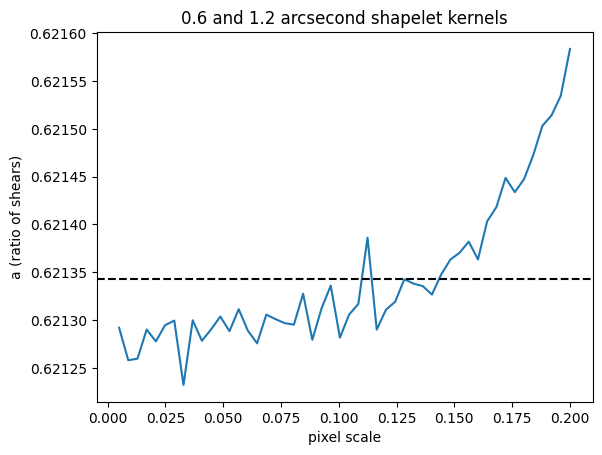

In [311]:
plt.plot(scales, a_scale)
#plt.axhline(np.mean(a_scale), ls='--', c='black')
#plt.ylim([min(a_scale),max(a_scale)])
plt.xlabel('pixel scale')
plt.ylabel('a (ratio of shears)')
plt.title('0.6 and 1.2 arcsecond shapelet kernels')

perc_var = (max(a_scale) - min(a_scale)) / min(a_scale) * 100
print('Max percentage variation in a', perc_var)

Text(0.5, 1.0, 'Measured shear, 0.6 shapelet kernels')

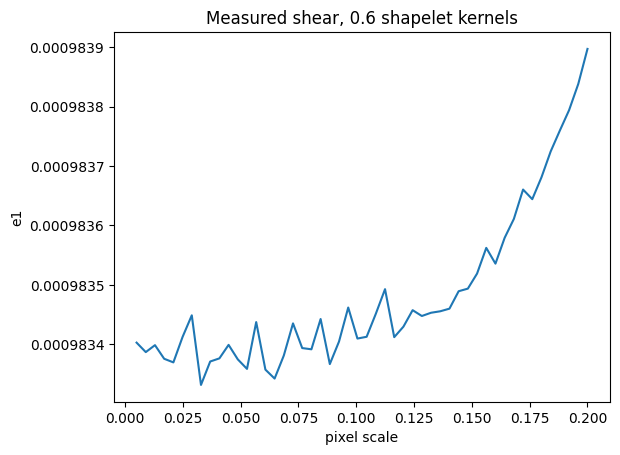

In [284]:
plt.plot(scales, in_bias_scale)
#plt.plot(scales, out_bias_scale)
plt.xlabel('pixel scale')
plt.ylabel('e1')
plt.title('Measured shear, 0.6 shapelet kernel')

Text(0.5, 1.0, 'Measured shear, 1.2 shapelet kernel')

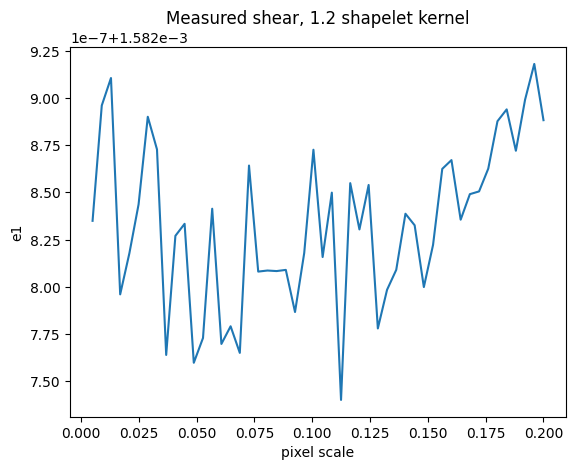

In [306]:
plt.plot(scales, out_bias_scale)
plt.xlabel('pixel scale')
plt.ylabel('e1')
plt.yticks
plt.title('Measured shear, 1.2 shapelet kernel')